In [19]:
# pip install  tensorflow

# important neccessary libraries
TensorFlow (tf) → For deep learning models

Matplotlib (plt) → For visualizing images & results

ImageDataGenerator → Augments & preprocesses images for training

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Explanation of Parameters:

1. rescale=1./255 → Normalizes the pixel values to the range [0,1] instead of [0,255].

2. shear_range=0.2 → Applies a shear transformation (distorts the image along an axis).

3. zoom_range=0.2 → Randomly zooms into images by up to 20%.

4. horizontal_flip=True → Randomly flips images horizontally.

In [2]:
# Corrected typos in variable names and paths
training_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [3]:
import zipfile
import os

zip_path = "CNN.zip"  # Change to your uploaded zip file
extract_path = "."  # Change if you want to extract elsewhere

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


# Explanation:

* This line creates a data generator that loads images from a specified directory (CNN/training_set) and applies the transformations defined in training_datagen. Let's break down each parameter."CNN/training_set"
* Specifies the path to the training dataset directory.
* Inside this folder, there should be subdirectories corresponding to different classes (e.g., cats/ and dogs/ if it's a binary classification problem).

 1. target_size=(64, 64)
      Resizes all images to 64x64 pixels before feeding them into the model (useful for CNN input consistency).
 2. batch_size=32
      Defines the number of images per batch during training.
      A batch of 32 images is processed at a time, which helps in efficient training.
3. class_mode='binary'
      Indicates that this is a binary classification problem (e.g., Cats vs. Dogs).
      If there were more than two classes, you would use 'categorical' instead.

In [4]:
training_set = training_datagen.flow_from_directory("CNN/training_set",
                                                    target_size=(64, 64), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 8000 images belonging to 2 classes.


# Creates an image data generator
1. rescale=1./255 → Normalizes pixel values (0-255 → 0-1).
2. shear_range=0.2 → Applies a shear transformation (tilts images).
3. zoom_range=0.2 → Randomly zooms in/out on images.
4. horizontal_flip=True → Flips images horizontally for augmentation.

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [6]:
test_set = test_datagen.flow_from_directory("CNN/training_set",
                                                    target_size=(64, 64), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 8000 images belonging to 2 classes.


* Conv2D * 
→ This is a convolutional layer that extracts features from images.

 * filters*=32 → The number of feature detectors (kernels/filters) used.

 * kernel_size*=3 → Each filter is 3x3 pixels in size.

 * activation*='relu' → Uses ReLU (Rectified Linear Unit) activation, which helps introduce non-linearity.

 * input_shape*=(64, 64, 3) → Specifies the input image dimensions:
    64x64 pixels (since we resized images earlier).
    3 channels (RGB images).

In [29]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


# Max Pooling Layer.
  * Reduces the spatial size of feature maps, helping to:

  * Reduce computational complexity.

  * Extract dominant features while reducing noise.

  * Prevent overfitting.

# Parameters:

  * pool_size=2 → A 2x2 window is used to take the maximum value from each region.

  * strides=2 → Moves 2 pixels at a time (non-overlapping pooling).



In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())

# Why Use Dense Layers?
* Extract Deeper Features → Fully connected layers combine information learned from convolutional layers.
* Dense(units=128, activation='relu')

* This adds a fully connected layer with 128 neurons.

* ReLU activation (relu) → Introduces non-linearity, helping the model learn complex patterns.

* These layers are usually added after Flattening (converting feature maps into a 1D vector).



In [31]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))


# Components:
1. optimizer='adam'
   Uses the Adam optimizer, which is efficient for deep learning models.
   It adjusts the learning rate dynamically during training.

2. loss='binary_crossentropy'
   Since this is a binary classification problem (e.g., Cats vs. Dogs), we use binary cross-entropy.
   This loss function measures the difference between actual and predicted probabilities.

3. metrics=['acc']
   Tracks accuracy (acc) as a performance metric during training.

In [32]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

 #Breaking it Down
1. cnn.fit(...)
    The .fit() method is used to train the model.
    It iterates through the dataset multiple times (epochs) and updates the model’s weights.

2. training_set
   The dataset used for training.
   It comes from flow_from_directory(...) and includes augmented images (resized, flipped, etc.).

3. validation_data=test_set
   Uses the test dataset (test_set) for validation.
   Helps check model performance on unseen data.

4. epochs=5
   The model will go through the entire dataset 5 times.
   More epochs can help improve accuracy, but too many can lead to overfitting.

5. history
   Stores training metrics (loss, accuracy, etc.) for each epoch.
   Can be used for visualizing training progress.

In [33]:

history = cnn.fit(training_set, validation_data=test_set, epochs=5)


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 74s 293ms/step - acc: 0.5526 - loss: 0.6867 - val_acc: 0.6685 - val_loss: 0.6157
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 146ms/step - acc: 0.6734 - loss: 0.6121 - val_acc: 0.6869 - val_loss: 0.5979
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 146ms/step - acc: 0.7024 - loss: 0.5687 - val_acc: 0.7306 - val_loss: 0.5204
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 144ms/step - acc: 0.7469 - loss: 0.5158 - val_acc: 0.7360 - val_loss: 0.5230
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 140ms/step - acc: 0.7457 - loss: 0.5159 - val_acc: 0.7546 - val_loss: 0.4944


# Breaking it Down
1. import numpy as np

   * NumPy is used for handling numerical operations and converting images into arrays before feeding them into the model.


2. from keras.preprocessing import image

   * image is a utility module from Keras used for:

   * Loading an image from a file.

   * Preprocessing it (resizing, normalizing, etc.).

   * Converting it into a format suitable for prediction.

In [34]:
import numpy as np
from keras.preprocessing import image

In [35]:
import tensorflow as tf
import numpy as np

# Load and resize the image to match the input size of the CNN
test_image = tf.keras.utils.load_img("CNN/single_prediction/cat_or_dog_2.jpg", target_size=(64, 64))

# Convert image to array
test_image = tf.keras.utils.img_to_array(test_image)

# Expand dimensions to match the batch format
test_image = np.expand_dims(test_image, axis=0)  # Shape will be (1, 64, 64, 3)

# Predict the result using your CNN model
result = cnn.predict(test_image)

# Get class indices  # Retrieves the class labels from the training set.
class_indices = training_set.class_indices  # {'cats': 0, 'dogs': 1}

# Determine prediction
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
cat


 * matplotlib.pyplot is a module that provides functions for creating graphs, charts, and visualizations.

* It works like MATLAB’s plotting functions and is commonly used for plotting model training results.

In [36]:
import matplotlib.pyplot as plt

In [37]:
history = cnn.fit(training_set,validation_data=test_set,epochs=5)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 146ms/step - acc: 0.7612 - loss: 0.4841 - val_acc: 0.7625 - val_loss: 0.4809
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 141ms/step - acc: 0.7706 - loss: 0.4668 - val_acc: 0.8074 - val_loss: 0.4269
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 148ms/step - acc: 0.7993 - loss: 0.4362 - val_acc: 0.7940 - val_loss: 0.4313
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 149ms/step - acc: 0.8015 - loss: 0.4172 - val_acc: 0.8216 - val_loss: 0.3931
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 143ms/step - acc: 0.8070 - loss: 0.4091 - val_acc: 0.8142 - val_loss: 0.4083


* cnn.evaluate(test_set) runs the trained model on the test dataset (test_set) and returns:

* Test Loss (test_loss) → Measures how well the model is performing. Lower is better.

* Test Accuracy (test_acc) → The percentage of correctly classified test images.

In [38]:
test_loss, test_acc= cnn.evaluate(test_set)

250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - acc: 0.8069 - loss: 0.4035


In [39]:
print("Test Loss:",test_loss)
print("Test Accuracy:",test_acc)

Test Loss: 0.3988202214241028
Test Accuracy: 0.8151249885559082


* Creates a new figure for the plot.
* dpi=300 → Sets a high resolution for better clarity.

* history.history['acc'] → Training accuracy over epochs.
* history.history['val_acc'] → Validation accuracy over epochs.

* Adds title, labels for axes

* Adds a legend to differentiate between training (train) and validation (val) accuracy.
* loc='best' → Automatically places the legend in the best position.

* plt.tight_layout() → Adjusts spacing to avoid overlap.
* plt.show() → Displays the plot.


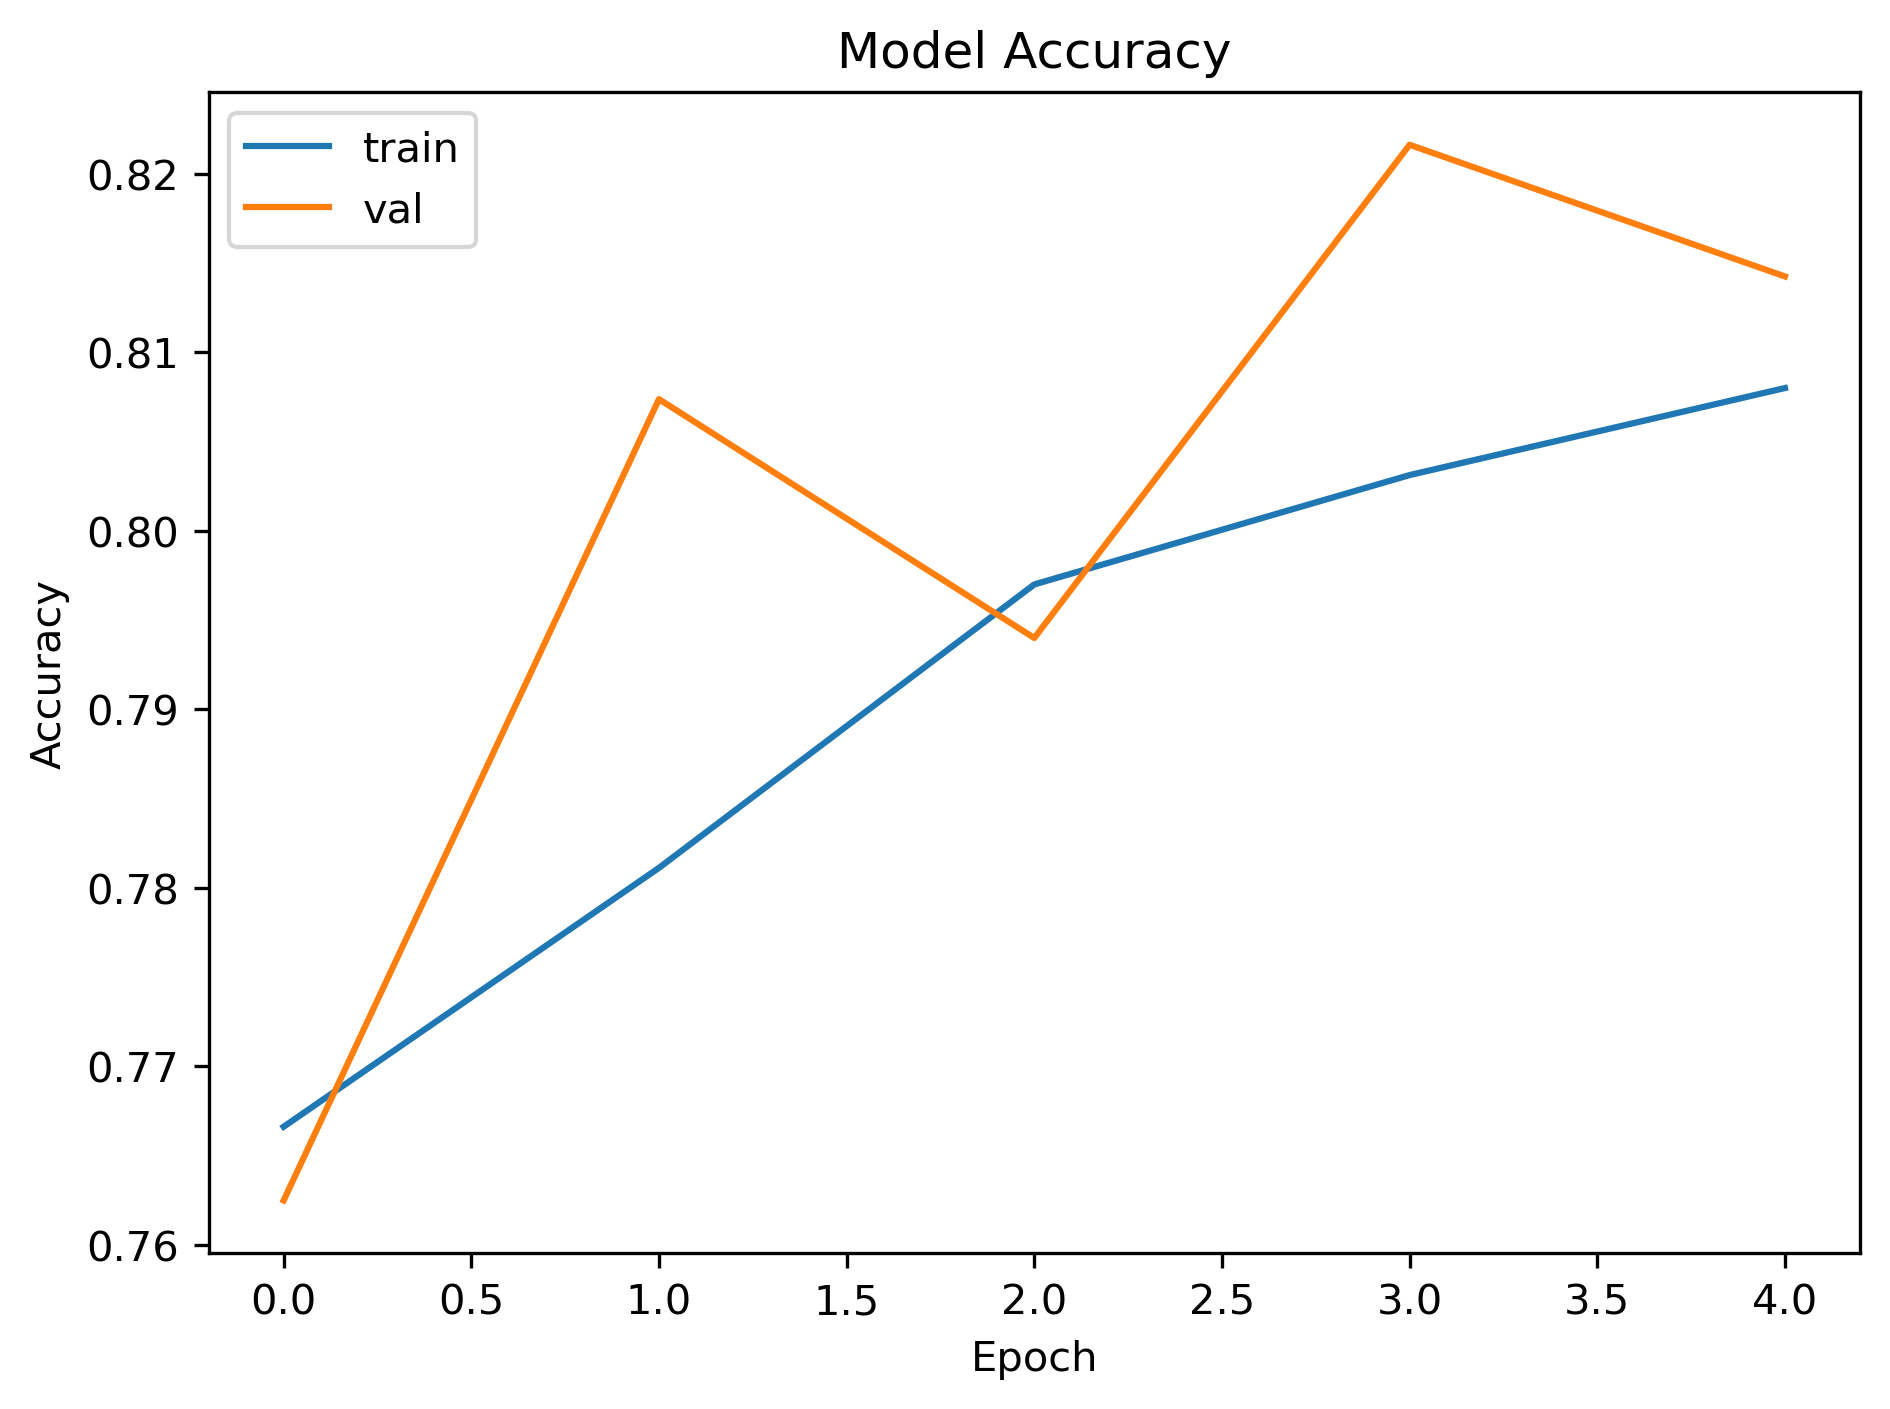

In [40]:
plt.figure(dpi=300)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')  # Corrected tittle to title
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='best')
plt.tight_layout()
plt.show()

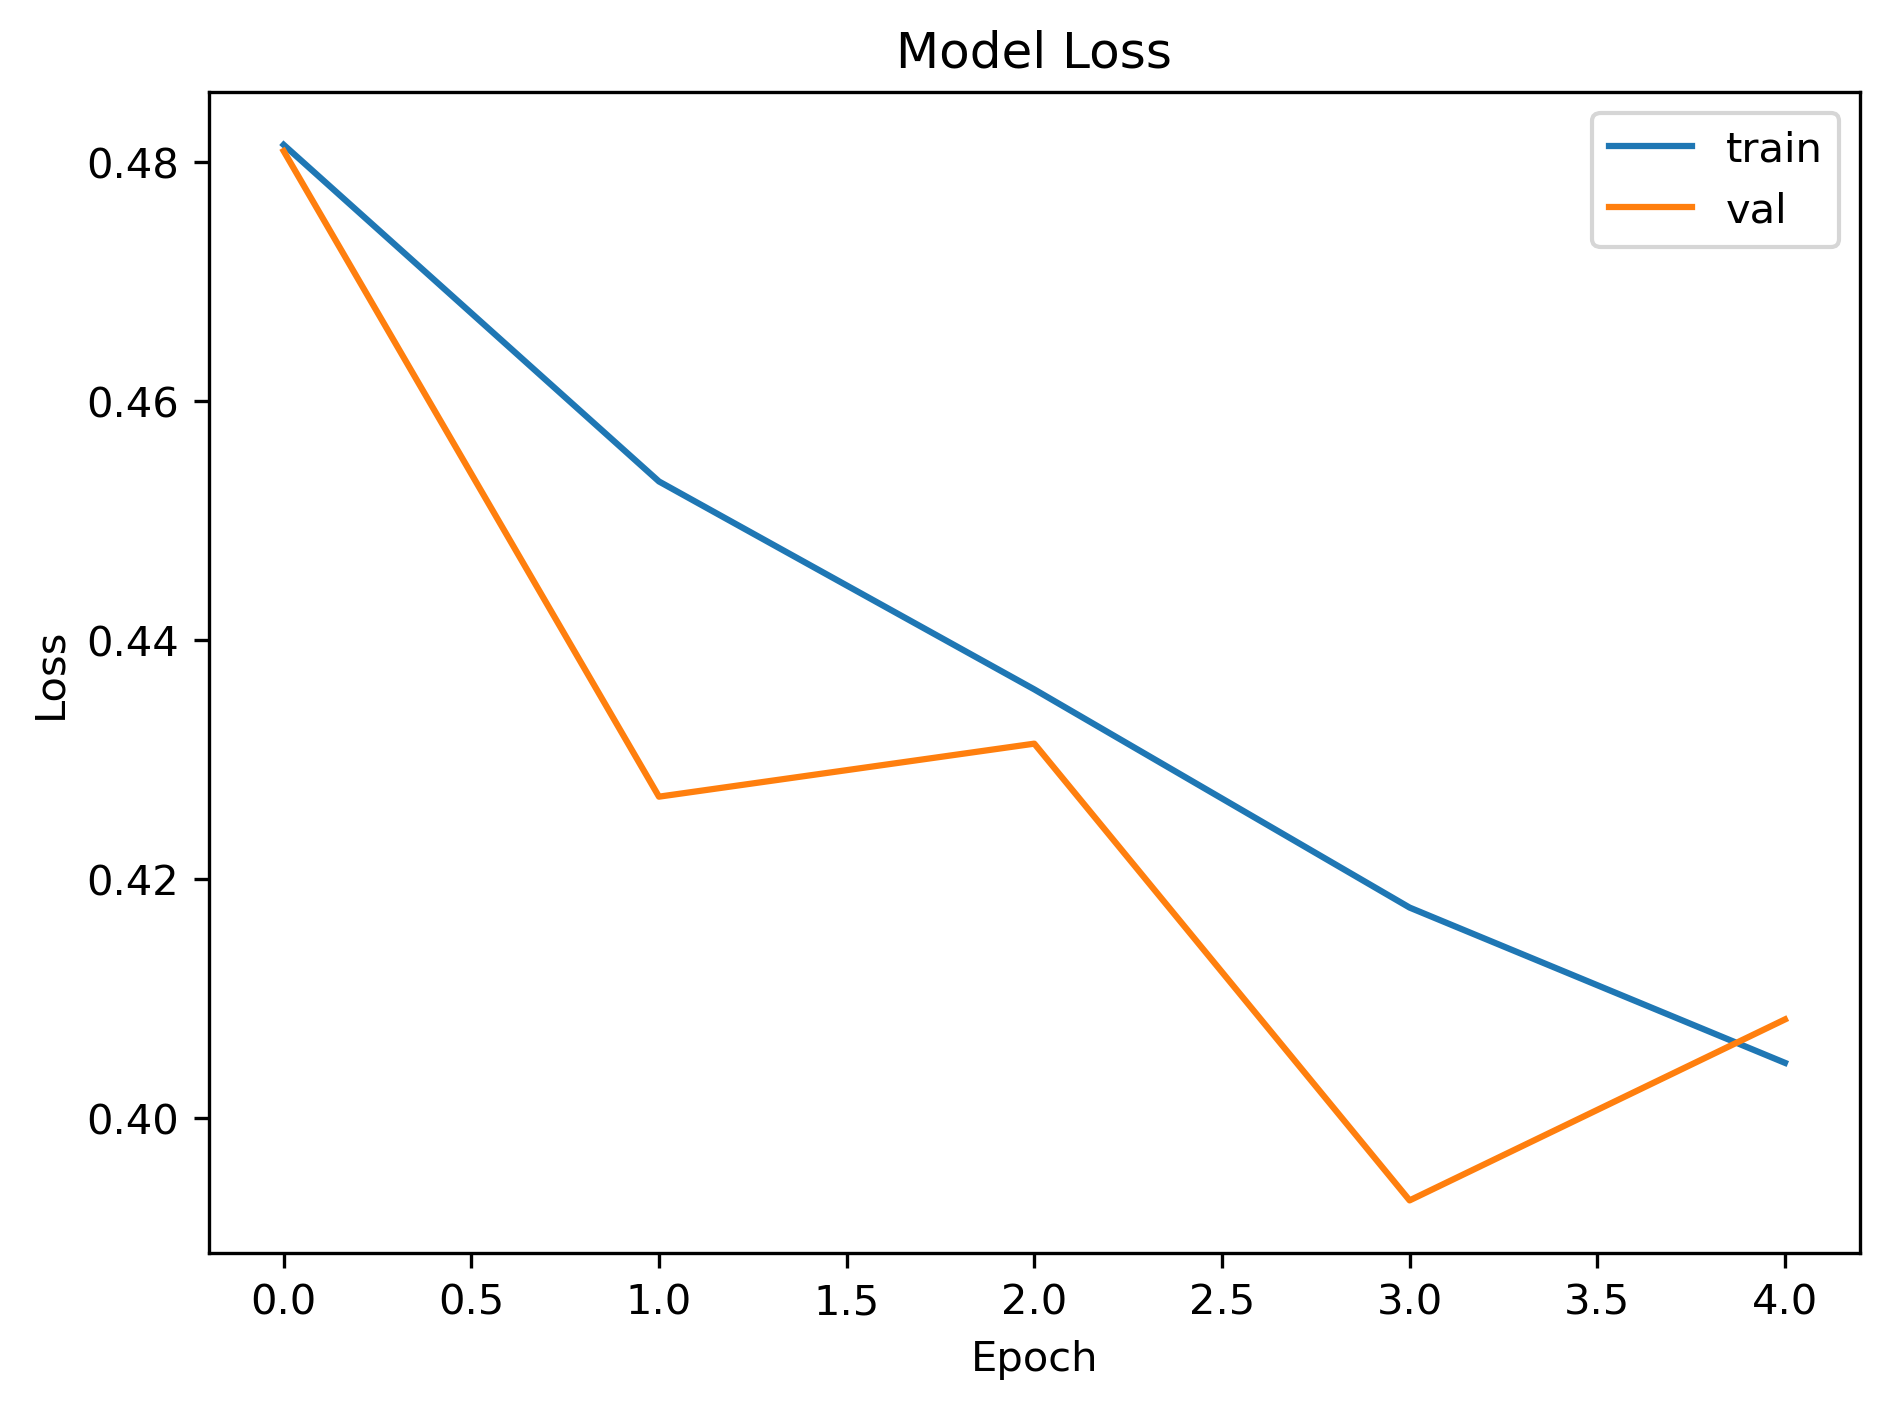

In [41]:
plt.figure(dpi=300)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')  # Corrected tittle to title
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='best')
plt.tight_layout()
plt.show()